In [5]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

In [6]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels),(test_images,test_labels) = fashion_mnist.load_data()

In [7]:
train_images.shape

(60000, 28, 28)

In [8]:
test_images.shape

(10000, 28, 28)

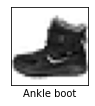

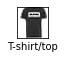

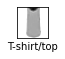

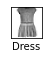

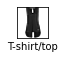

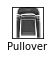

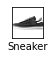

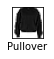

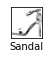

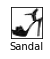

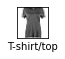

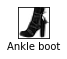

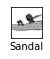

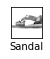

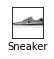

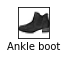

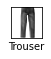

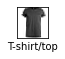

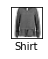

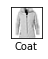

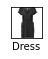

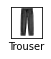

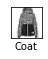

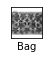

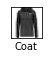

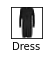

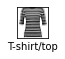

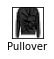

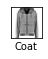

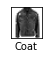

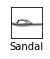

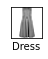

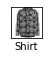

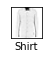

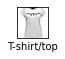

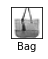

In [9]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10)) 
for i in range(36):
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[train_labels[i]])
    plt.show()

In [10]:
train1 = train_images[:12000]
train2 = train_images[12000:24000] 
train3 = train_images[24000:36000] 
train4 = train_images[36000:48000] 
train5 = train_images[48000:60000]

In [11]:
len1 = len(train1) 
len2 = len(train2) 
len3 = len(train3) 
len4 = len(train4) 
len5 = len(train5)
len_test = len(test_images)


In [12]:
y1 = train_labels[:12000]
y2 = train_labels[12000:24000] 
y3 = train_labels[24000:36000] 
y4 = train_labels[36000:48000] 
y5 = train_labels[48000:60000]

<BarContainer object of 5 artists>

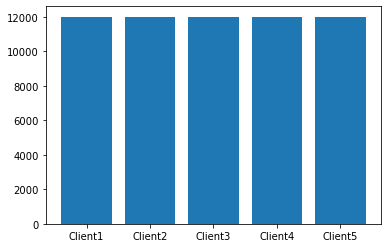

In [13]:
df = pd.Series(data=[len1, len2, len3, len4,len5], index=['Client1', 'Client2', 'Client3', 'Client4','Client5'], name="DATA").rename_axis("Data set length", axis=0)
x = df.index 
y = df.values
plt.bar(x, y)

In [14]:
# normalizing the input 
train1 = train1/255.0 
train2 = train2/255.0 
train3 = train3/255.0 
train4 = train4/255.0 
train5 = train5/255.0

In [15]:
# reshaping images in 3 dimensions 
train1 = train1.reshape(-1,28,28,1) 
train2 = train2.reshape(-1,28,28,1) 
train3 = train3.reshape(-1,28,28,1) 
train4 = train4.reshape(-1,28,28,1) 
train5 = train5.reshape(-1,28,28,1)

In [16]:
def MODEL1():

    model = tf.keras.Sequential([ 
        tf.keras.layers.Flatten(input_shape=(28, 28)), 
        tf.keras.layers.Dense(128, activation='relu'), 
        tf.keras.layers.Dense(10)
      ])
    model.compile(optimizer='adam',loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True), metrics=['accuracy']) 
    return model

In [17]:
#5 models for 5 clients 
model1 = MODEL1()
model2 = MODEL1() 
model3 = MODEL1() 
model4 = MODEL1() 
model5 = MODEL1()

In [18]:
#training 5 models for 5 clients 
for i in range(1):
    h1 = model1.fit(train1, y1, validation_split=0.2, epochs=3, verbose=1) 
    h2 = model2.fit(train2, y2, validation_split=0.2, epochs=3, verbose=1) 
    h3 = model3.fit(train3, y3, validation_split=0.2, epochs=3, verbose=1) 
    h4 = model4.fit(train4, y4, validation_split=0.2, epochs=3, verbose=1) 
    h5 = model5.fit(train5, y5, validation_split=0.2, epochs=3, verbose=1)

Epoch 1/3
300/300 [==============================] - 1s 3ms/step - loss: 0.6896 - accuracy: 0.7600 - val_loss: 0.5509 - val_accuracy: 0.8033
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.4870 - accuracy: 0.8299 - val_loss: 0.5394 - val_accuracy: 0.8050
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.4245 - accuracy: 0.8489 - val_loss: 0.4443 - val_accuracy: 0.8446
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.7194 - accuracy: 0.7455 - val_loss: 0.5596 - val_accuracy: 0.8017
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.5133 - accuracy: 0.8167 - val_loss: 0.4843 - val_accuracy: 0.8267
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.4465 - accuracy: 0.8372 - val_loss: 0.5103 - val_accuracy: 0.8158
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.7052 - accuracy: 0.7559 - val_loss: 0.5196 - val_accuracy: 0.8267
Epoch 2/3
300

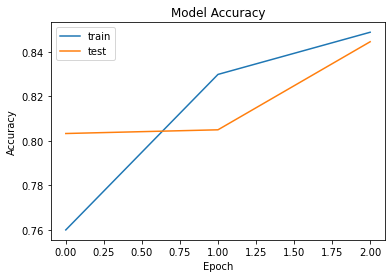

313/313 - 0s - loss: 67.2537 - accuracy: 0.8262 - 324ms/epoch - 1ms/step


[67.25365447998047, 0.826200008392334]

In [20]:
plt.plot(h1.history['accuracy'])
plt.plot(h1.history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
model1.evaluate(test_images, test_labels, verbose=2)


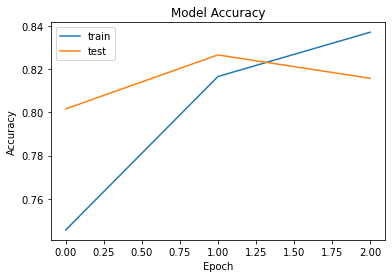

313/313 - 0s - loss: 77.8396 - accuracy: 0.8035 - 340ms/epoch - 1ms/step


[77.83963012695312, 0.8034999966621399]

In [21]:
plt.plot(h2.history['accuracy']) 
plt.plot(h2.history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
model2.evaluate(test_images, test_labels, verbose=2)

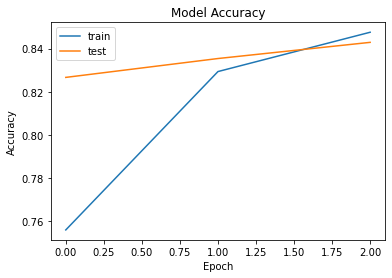

313/313 - 0s - loss: 71.2126 - accuracy: 0.8246 - 315ms/epoch - 1ms/step


[71.21260833740234, 0.8245999813079834]

In [22]:
plt.plot(h3.history['accuracy']) 
plt.plot(h3.history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
model3.evaluate(test_images, test_labels, verbose=2)

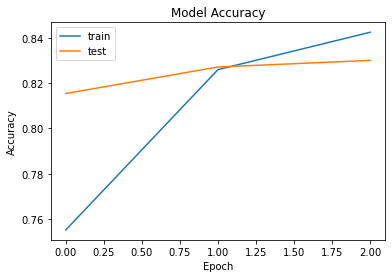

313/313 - 0s - loss: 87.3168 - accuracy: 0.8008 - 317ms/epoch - 1ms/step


[87.31684112548828, 0.8008000254631042]

In [23]:
plt.plot(h4.history['accuracy']) 
plt.plot(h4.history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
model4.evaluate(test_images, test_labels, verbose=2)

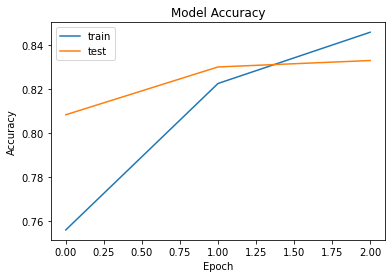

313/313 - 0s - loss: 72.8616 - accuracy: 0.8254 - 331ms/epoch - 1ms/step


[72.86162567138672, 0.8253999948501587]

In [24]:
plt.plot(h5.history['accuracy']) 
plt.plot(h5.history['val_accuracy']) 
plt.title('Model Accuracy') 
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['train', 'test'], loc='upper left') 
plt.show()
model5.evaluate(test_images, test_labels, verbose=2)

In [25]:
model1 = MODEL1() 
model2 = MODEL1() 
model3 = MODEL1() 
model4 = MODEL1() 
model5 = MODEL1()

In [27]:
for i in range(50):
    h1 = model1.fit(train1, y1,validation_split = 0.2, epochs=3, verbose=1)
    h2 = model2.fit(train2, y2,validation_split = 0.2, epochs=3, verbose=1)
    h3 = model3.fit(train3, y3,validation_split = 0.2, epochs=3, verbose=1)
    h4 = model4.fit(train4, y4,validation_split = 0.2, epochs=3, verbose=1)
    h5 = model5.fit(train5, y5,validation_split = 0.2, epochs=3, verbose=1)

Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.7238 - accuracy: 0.7484 - val_loss: 0.5439 - val_accuracy: 0.8117
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.4959 - accuracy: 0.8266 - val_loss: 0.4812 - val_accuracy: 0.8400
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.4376 - accuracy: 0.8451 - val_loss: 0.4515 - val_accuracy: 0.8479
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.7141 - accuracy: 0.7492 - val_loss: 0.5311 - val_accuracy: 0.8125
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.5044 - accuracy: 0.8214 - val_loss: 0.4937 - val_accuracy: 0.8263
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.4506 - accuracy: 0.8382 - val_loss: 0.4516 - val_accuracy: 0.8479
Epoch 1/3
300/300 [==============================] - 1s 3ms/step - loss: 0.6962 - accuracy: 0.7585 - val_loss: 0.5508 - val_accuracy: 0.8263
Epoch 2/3
300

300/300 [==============================] - 1s 2ms/step - loss: 0.3027 - accuracy: 0.8893 - val_loss: 0.3794 - val_accuracy: 0.8600
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2787 - accuracy: 0.8970 - val_loss: 0.4245 - val_accuracy: 0.8471
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2428 - accuracy: 0.9121 - val_loss: 0.4373 - val_accuracy: 0.8512
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2312 - accuracy: 0.9176 - val_loss: 0.3915 - val_accuracy: 0.8621
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2269 - accuracy: 0.9185 - val_loss: 0.4338 - val_accuracy: 0.8558
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2611 - accuracy: 0.9029 - val_loss: 0.3787 - val_accuracy: 0.8692
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.2540 - accuracy: 0.9094 - val_loss: 0.3989 - val_accuracy: 0.8687
Epoch 3/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.1606 - accuracy: 0.9455 - val_loss: 0.4262 - val_accuracy: 0.8550
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1768 - accuracy: 0.9343 - val_loss: 0.4396 - val_accuracy: 0.8571
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1725 - accuracy: 0.9380 - val_loss: 0.4395 - val_accuracy: 0.8621
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1679 - accuracy: 0.9397 - val_loss: 0.4812 - val_accuracy: 0.8479
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1575 - accuracy: 0.9443 - val_loss: 0.3930 - val_accuracy: 0.8763
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1584 - accuracy: 0.9414 - val_loss: 0.3966 - val_accuracy: 0.8712
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1329 - accuracy: 0.9517 - val_loss: 0.4296 - val_accuracy: 0.8671
Epoch 1/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.1113 - accuracy: 0.9608 - val_loss: 0.4775 - val_accuracy: 0.8642
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1067 - accuracy: 0.9630 - val_loss: 0.4585 - val_accuracy: 0.8658
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0955 - accuracy: 0.9684 - val_loss: 0.4590 - val_accuracy: 0.8658
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1158 - accuracy: 0.9573 - val_loss: 0.4870 - val_accuracy: 0.8600
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1092 - accuracy: 0.9620 - val_loss: 0.4921 - val_accuracy: 0.8625
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1038 - accuracy: 0.9633 - val_loss: 0.4831 - val_accuracy: 0.8558
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1040 - accuracy: 0.9629 - val_loss: 0.4598 - val_accuracy: 0.8742
Epoch 2/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0699 - accuracy: 0.9762 - val_loss: 0.6496 - val_accuracy: 0.8625
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0738 - accuracy: 0.9734 - val_loss: 0.6562 - val_accuracy: 0.8671
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0721 - accuracy: 0.9772 - val_loss: 0.5152 - val_accuracy: 0.8650
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0791 - accuracy: 0.9747 - val_loss: 0.5086 - val_accuracy: 0.8704
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0684 - accuracy: 0.9766 - val_loss: 0.6341 - val_accuracy: 0.8479
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0809 - accuracy: 0.9710 - val_loss: 0.5995 - val_accuracy: 0.8533
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0753 - accuracy: 0.9734 - val_loss: 0.5622 - val_accuracy: 0.8583
Epoch 3/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0513 - accuracy: 0.9827 - val_loss: 0.6250 - val_accuracy: 0.8733
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0505 - accuracy: 0.9828 - val_loss: 0.7651 - val_accuracy: 0.8625
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0440 - accuracy: 0.9861 - val_loss: 0.7385 - val_accuracy: 0.8642
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0463 - accuracy: 0.9856 - val_loss: 0.7851 - val_accuracy: 0.8604
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0546 - accuracy: 0.9826 - val_loss: 0.5889 - val_accuracy: 0.8704
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0412 - accuracy: 0.9860 - val_loss: 0.6405 - val_accuracy: 0.8667
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0517 - accuracy: 0.9817 - val_loss: 0.6667 - val_accuracy: 0.8562
Epoch 1/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0432 - accuracy: 0.9841 - val_loss: 0.6533 - val_accuracy: 0.8717
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0413 - accuracy: 0.9861 - val_loss: 0.7248 - val_accuracy: 0.8646
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0369 - accuracy: 0.9890 - val_loss: 0.7116 - val_accuracy: 0.8692
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0355 - accuracy: 0.9883 - val_loss: 0.8132 - val_accuracy: 0.8708
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0273 - accuracy: 0.9920 - val_loss: 0.8558 - val_accuracy: 0.8654
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0435 - accuracy: 0.9840 - val_loss: 0.8521 - val_accuracy: 0.8604
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0421 - accuracy: 0.9872 - val_loss: 0.6503 - val_accuracy: 0.8608
Epoch 2/3
300/300 [====

300/300 [==============================] - 0s 2ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.6358 - val_accuracy: 0.8825
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0209 - accuracy: 0.9933 - val_loss: 0.6919 - val_accuracy: 0.8742
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0420 - accuracy: 0.9856 - val_loss: 0.8072 - val_accuracy: 0.8592
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0515 - accuracy: 0.9814 - val_loss: 0.7804 - val_accuracy: 0.8604
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0239 - accuracy: 0.9924 - val_loss: 0.7652 - val_accuracy: 0.8704
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0298 - accuracy: 0.9902 - val_loss: 0.9064 - val_accuracy: 0.8679
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0176 - accuracy: 0.9956 - val_loss: 0.9596 - val_accuracy: 0.8600
Epoch 3/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0216 - accuracy: 0.9936 - val_loss: 0.8809 - val_accuracy: 0.8512
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0207 - accuracy: 0.9942 - val_loss: 0.7112 - val_accuracy: 0.8813
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0145 - accuracy: 0.9952 - val_loss: 0.7297 - val_accuracy: 0.8821
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9890 - val_loss: 0.7367 - val_accuracy: 0.8775
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0292 - accuracy: 0.9910 - val_loss: 0.7778 - val_accuracy: 0.8683
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0151 - accuracy: 0.9958 - val_loss: 0.7755 - val_accuracy: 0.8717
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0133 - accuracy: 0.9967 - val_loss: 0.8382 - val_accuracy: 0.8646
Epoch 1/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0144 - accuracy: 0.9962 - val_loss: 0.8973 - val_accuracy: 0.8554
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0165 - accuracy: 0.9949 - val_loss: 0.9798 - val_accuracy: 0.8500
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0330 - accuracy: 0.9893 - val_loss: 0.9044 - val_accuracy: 0.8654
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0222 - accuracy: 0.9924 - val_loss: 0.7711 - val_accuracy: 0.8796
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0069 - accuracy: 0.9986 - val_loss: 0.7254 - val_accuracy: 0.8829
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0033 - accuracy: 0.9999 - val_loss: 0.7431 - val_accuracy: 0.8863
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0132 - accuracy: 0.9967 - val_loss: 0.8537 - val_accuracy: 0.8712
Epoch 2/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0049 - accuracy: 0.9989 - val_loss: 0.8757 - val_accuracy: 0.8612
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0295 - accuracy: 0.9899 - val_loss: 0.8810 - val_accuracy: 0.8483
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0135 - accuracy: 0.9970 - val_loss: 0.9384 - val_accuracy: 0.8575
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0190 - accuracy: 0.9942 - val_loss: 1.0577 - val_accuracy: 0.8479
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0181 - accuracy: 0.9944 - val_loss: 0.9980 - val_accuracy: 0.8596
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0294 - accuracy: 0.9897 - val_loss: 0.9885 - val_accuracy: 0.8575
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0296 - accuracy: 0.9905 - val_loss: 0.8518 - val_accuracy: 0.8717
Epoch 3/3
300/300 [====

300/300 [==============================] - 0s 2ms/step - loss: 0.0012 - accuracy: 1.0000 - val_loss: 1.1458 - val_accuracy: 0.8737
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0102 - accuracy: 0.9970 - val_loss: 0.9264 - val_accuracy: 0.8587
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0188 - accuracy: 0.9943 - val_loss: 0.9670 - val_accuracy: 0.8579
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0460 - accuracy: 0.9853 - val_loss: 0.9369 - val_accuracy: 0.8608
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0425 - accuracy: 0.9844 - val_loss: 1.0129 - val_accuracy: 0.8537
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0256 - accuracy: 0.9927 - val_loss: 0.9634 - val_accuracy: 0.8579
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0101 - accuracy: 0.9969 - val_loss: 1.0063 - val_accuracy: 0.8558
Epoch 1/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9996 - val_loss: 1.1864 - val_accuracy: 0.8671
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0965 - accuracy: 0.9722 - val_loss: 1.2911 - val_accuracy: 0.8504
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0345 - accuracy: 0.9894 - val_loss: 1.1271 - val_accuracy: 0.8646
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0450 - accuracy: 0.9867 - val_loss: 0.9021 - val_accuracy: 0.8633
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0213 - accuracy: 0.9924 - val_loss: 0.9238 - val_accuracy: 0.8617
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0084 - accuracy: 0.9972 - val_loss: 0.9448 - val_accuracy: 0.8671
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0032 - accuracy: 0.9992 - val_loss: 1.0655 - val_accuracy: 0.8554
Epoch 2/3
300/300 [====

In [33]:
w1 = model1.get_weights() 
w2 = model2.get_weights() 
w3 = model3.get_weights() 
w4 = model4.get_weights() 
w5 = model5.get_weights()

In [38]:
np.warnings.filterwarnings('ignore', category=np.VisibleDeprecationWarning) 

In [39]:
a = np.array(w1) 
b = np.array(w2)
c = np.array(w3) 
d = np.array(w4) 
e = np.array(w5)

In [40]:
mean = (a+b+c+d+e)/5

In [41]:
model1.set_weights(mean) 
model2.set_weights(mean) 
model3.set_weights(mean) 
model4.set_weights(mean) 
model5.set_weights(mean)

In [42]:
model1.evaluate(test_images, test_labels, verbose=2) 
model2.evaluate(test_images, test_labels, verbose=2) 
model3.evaluate(test_images, test_labels, verbose=2) 
model4.evaluate(test_images, test_labels, verbose=2) 
model5.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 239.3512 - accuracy: 0.5092 - 450ms/epoch - 1ms/step
313/313 - 0s - loss: 239.3512 - accuracy: 0.5092 - 316ms/epoch - 1ms/step
313/313 - 0s - loss: 239.3512 - accuracy: 0.5092 - 322ms/epoch - 1ms/step
313/313 - 0s - loss: 239.3512 - accuracy: 0.5092 - 417ms/epoch - 1ms/step
313/313 - 0s - loss: 239.3512 - accuracy: 0.5092 - 347ms/epoch - 1ms/step


[239.35118103027344, 0.5091999769210815]

In [43]:
model1 = MODEL1() 
model2 = MODEL1() 
model3 = MODEL1() 
model4 = MODEL1() 
model5 = MODEL1()

In [45]:
for i in range(50):
    h1 = model1.fit(train1, y1,validation_split = 0.2, epochs=3, verbose=1)
    h2 = model2.fit(train2, y2,validation_split = 0.2, epochs=3, verbose=1)
    h3 = model3.fit(train3, y3,validation_split = 0.2, epochs=3, verbose=1) 
    h4 = model4.fit(train4, y4,validation_split = 0.2, epochs=3, verbose=1)
    h5 = model5.fit(train5, y5,validation_split = 0.2, epochs=3, verbose=1)

Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.7168 - accuracy: 0.7493 - val_loss: 0.5423 - val_accuracy: 0.8096
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.4927 - accuracy: 0.8249 - val_loss: 0.5097 - val_accuracy: 0.8258
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.4353 - accuracy: 0.8484 - val_loss: 0.4318 - val_accuracy: 0.8562
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.7157 - accuracy: 0.7496 - val_loss: 0.5816 - val_accuracy: 0.7862
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.5014 - accuracy: 0.8179 - val_loss: 0.4819 - val_accuracy: 0.8304
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.4445 - accuracy: 0.8359 - val_loss: 0.4485 - val_accuracy: 0.8413
Epoch 1/3
300/300 [==============================] - 1s 3ms/step - loss: 0.7311 - accuracy: 0.7476 - val_loss: 0.5419 - val_accuracy: 0.8229
Epoch 2/3
300

300/300 [==============================] - 1s 2ms/step - loss: 0.2891 - accuracy: 0.8964 - val_loss: 0.3938 - val_accuracy: 0.8546
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2760 - accuracy: 0.9011 - val_loss: 0.3928 - val_accuracy: 0.8533
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2416 - accuracy: 0.9122 - val_loss: 0.3988 - val_accuracy: 0.8621
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2397 - accuracy: 0.9150 - val_loss: 0.3913 - val_accuracy: 0.8604
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2268 - accuracy: 0.9185 - val_loss: 0.3732 - val_accuracy: 0.8708
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2636 - accuracy: 0.9016 - val_loss: 0.3830 - val_accuracy: 0.8662
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.2512 - accuracy: 0.9069 - val_loss: 0.3926 - val_accuracy: 0.8575
Epoch 3/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.1589 - accuracy: 0.9434 - val_loss: 0.4165 - val_accuracy: 0.8687
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1849 - accuracy: 0.9328 - val_loss: 0.4072 - val_accuracy: 0.8600
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1714 - accuracy: 0.9394 - val_loss: 0.4446 - val_accuracy: 0.8512
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1647 - accuracy: 0.9405 - val_loss: 0.3972 - val_accuracy: 0.8717
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1484 - accuracy: 0.9474 - val_loss: 0.4456 - val_accuracy: 0.8637
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1467 - accuracy: 0.9446 - val_loss: 0.4288 - val_accuracy: 0.8675
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1345 - accuracy: 0.9536 - val_loss: 0.4212 - val_accuracy: 0.8763
Epoch 1/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.1147 - accuracy: 0.9604 - val_loss: 0.4858 - val_accuracy: 0.8579
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1159 - accuracy: 0.9570 - val_loss: 0.4741 - val_accuracy: 0.8592
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1067 - accuracy: 0.9627 - val_loss: 0.4708 - val_accuracy: 0.8667
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1125 - accuracy: 0.9592 - val_loss: 0.4672 - val_accuracy: 0.8671
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1115 - accuracy: 0.9599 - val_loss: 0.4881 - val_accuracy: 0.8712
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.1070 - accuracy: 0.9613 - val_loss: 0.4743 - val_accuracy: 0.8650
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0940 - accuracy: 0.9655 - val_loss: 0.4412 - val_accuracy: 0.8763
Epoch 2/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0804 - accuracy: 0.9733 - val_loss: 0.6342 - val_accuracy: 0.8637
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0636 - accuracy: 0.9792 - val_loss: 0.6525 - val_accuracy: 0.8612
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0769 - accuracy: 0.9739 - val_loss: 0.5528 - val_accuracy: 0.8662
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0782 - accuracy: 0.9728 - val_loss: 0.5925 - val_accuracy: 0.8625
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0758 - accuracy: 0.9730 - val_loss: 0.5772 - val_accuracy: 0.8571
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0735 - accuracy: 0.9759 - val_loss: 0.5331 - val_accuracy: 0.8667
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0710 - accuracy: 0.9751 - val_loss: 0.5518 - val_accuracy: 0.8554
Epoch 3/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0500 - accuracy: 0.9829 - val_loss: 0.5933 - val_accuracy: 0.8725
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0581 - accuracy: 0.9793 - val_loss: 0.7672 - val_accuracy: 0.8654
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0406 - accuracy: 0.9873 - val_loss: 0.7167 - val_accuracy: 0.8646
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0387 - accuracy: 0.9881 - val_loss: 0.7634 - val_accuracy: 0.8621
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0489 - accuracy: 0.9837 - val_loss: 0.6847 - val_accuracy: 0.8487
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0449 - accuracy: 0.9843 - val_loss: 0.6249 - val_accuracy: 0.8562
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0488 - accuracy: 0.9831 - val_loss: 0.6684 - val_accuracy: 0.8512
Epoch 1/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0349 - accuracy: 0.9878 - val_loss: 0.6513 - val_accuracy: 0.8717
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0369 - accuracy: 0.9877 - val_loss: 0.7111 - val_accuracy: 0.8617
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0312 - accuracy: 0.9908 - val_loss: 0.6919 - val_accuracy: 0.8658
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0430 - accuracy: 0.9857 - val_loss: 0.8331 - val_accuracy: 0.8671
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0299 - accuracy: 0.9897 - val_loss: 0.8194 - val_accuracy: 0.8592
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0451 - accuracy: 0.9854 - val_loss: 0.7631 - val_accuracy: 0.8683
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0476 - accuracy: 0.9837 - val_loss: 0.6771 - val_accuracy: 0.8637
Epoch 2/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0275 - accuracy: 0.9902 - val_loss: 0.7815 - val_accuracy: 0.8554
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0442 - accuracy: 0.9831 - val_loss: 0.6673 - val_accuracy: 0.8788
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0283 - accuracy: 0.9908 - val_loss: 0.7583 - val_accuracy: 0.8558
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0200 - accuracy: 0.9944 - val_loss: 0.7624 - val_accuracy: 0.8671
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0200 - accuracy: 0.9941 - val_loss: 0.7480 - val_accuracy: 0.8704
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0514 - accuracy: 0.9827 - val_loss: 0.8471 - val_accuracy: 0.8650
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0220 - accuracy: 0.9940 - val_loss: 0.8788 - val_accuracy: 0.8596
Epoch 3/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0312 - accuracy: 0.9896 - val_loss: 0.8233 - val_accuracy: 0.8596
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0110 - accuracy: 0.9965 - val_loss: 0.6827 - val_accuracy: 0.8775
Epoch 2/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0398 - accuracy: 0.9871 - val_loss: 0.6857 - val_accuracy: 0.8708
Epoch 3/3
300/300 [==============================] - 0s 2ms/step - loss: 0.0158 - accuracy: 0.9956 - val_loss: 0.7064 - val_accuracy: 0.8758
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0170 - accuracy: 0.9950 - val_loss: 0.8144 - val_accuracy: 0.8704
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0174 - accuracy: 0.9949 - val_loss: 0.7701 - val_accuracy: 0.8671
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0153 - accuracy: 0.9949 - val_loss: 0.8673 - val_accuracy: 0.8596
Epoch 1/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0367 - accuracy: 0.9893 - val_loss: 0.8822 - val_accuracy: 0.8608
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0185 - accuracy: 0.9943 - val_loss: 0.8355 - val_accuracy: 0.8633
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0098 - accuracy: 0.9978 - val_loss: 0.8746 - val_accuracy: 0.8608
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0499 - accuracy: 0.9829 - val_loss: 0.7619 - val_accuracy: 0.8679
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0234 - accuracy: 0.9935 - val_loss: 0.7349 - val_accuracy: 0.8767
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0126 - accuracy: 0.9966 - val_loss: 0.7525 - val_accuracy: 0.8671
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0086 - accuracy: 0.9977 - val_loss: 0.8103 - val_accuracy: 0.8646
Epoch 2/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0078 - accuracy: 0.9984 - val_loss: 0.8870 - val_accuracy: 0.8679
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0058 - accuracy: 0.9987 - val_loss: 0.8833 - val_accuracy: 0.8687
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0444 - accuracy: 0.9850 - val_loss: 0.9588 - val_accuracy: 0.8508
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0316 - accuracy: 0.9875 - val_loss: 0.9301 - val_accuracy: 0.8542
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0104 - accuracy: 0.9969 - val_loss: 0.9037 - val_accuracy: 0.8629
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0171 - accuracy: 0.9941 - val_loss: 0.7526 - val_accuracy: 0.8767
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0112 - accuracy: 0.9969 - val_loss: 0.7484 - val_accuracy: 0.8767
Epoch 3/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0383 - accuracy: 0.9868 - val_loss: 1.0586 - val_accuracy: 0.8646
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0273 - accuracy: 0.9909 - val_loss: 0.9625 - val_accuracy: 0.8517
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0266 - accuracy: 0.9912 - val_loss: 0.9664 - val_accuracy: 0.8504
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0097 - accuracy: 0.9972 - val_loss: 0.9202 - val_accuracy: 0.8662
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0039 - accuracy: 0.9990 - val_loss: 0.9928 - val_accuracy: 0.8604
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0752 - accuracy: 0.9791 - val_loss: 1.0055 - val_accuracy: 0.8625
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0347 - accuracy: 0.9884 - val_loss: 0.9377 - val_accuracy: 0.8612
Epoch 1/3
300/300 [====

300/300 [==============================] - 1s 2ms/step - loss: 0.0022 - accuracy: 0.9999 - val_loss: 1.0916 - val_accuracy: 0.8767
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0017 - accuracy: 0.9999 - val_loss: 1.1079 - val_accuracy: 0.8733
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0013 - accuracy: 1.0000 - val_loss: 1.1317 - val_accuracy: 0.8712
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0349 - accuracy: 0.9921 - val_loss: 1.1174 - val_accuracy: 0.8404
Epoch 2/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0603 - accuracy: 0.9800 - val_loss: 0.9424 - val_accuracy: 0.8575
Epoch 3/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0092 - accuracy: 0.9969 - val_loss: 0.9574 - val_accuracy: 0.8625
Epoch 1/3
300/300 [==============================] - 1s 2ms/step - loss: 0.0066 - accuracy: 0.9981 - val_loss: 0.9837 - val_accuracy: 0.8625
Epoch 2/3
300/300 [====

In [46]:
model1.evaluate(test_images, test_labels, verbose=2) 
model2.evaluate(test_images, test_labels, verbose=2) 
model3.evaluate(test_images, test_labels, verbose=2) 
model4.evaluate(test_images, test_labels, verbose=2) 
model5.evaluate(test_images, test_labels, verbose=2)

313/313 - 0s - loss: 306.0076 - accuracy: 0.8415 - 442ms/epoch - 1ms/step
313/313 - 0s - loss: 287.9307 - accuracy: 0.8369 - 416ms/epoch - 1ms/step
313/313 - 0s - loss: 290.2380 - accuracy: 0.8467 - 352ms/epoch - 1ms/step
313/313 - 0s - loss: 281.6328 - accuracy: 0.8438 - 362ms/epoch - 1ms/step
313/313 - 0s - loss: 281.0291 - accuracy: 0.8465 - 402ms/epoch - 1ms/step


[281.02911376953125, 0.8464999794960022]

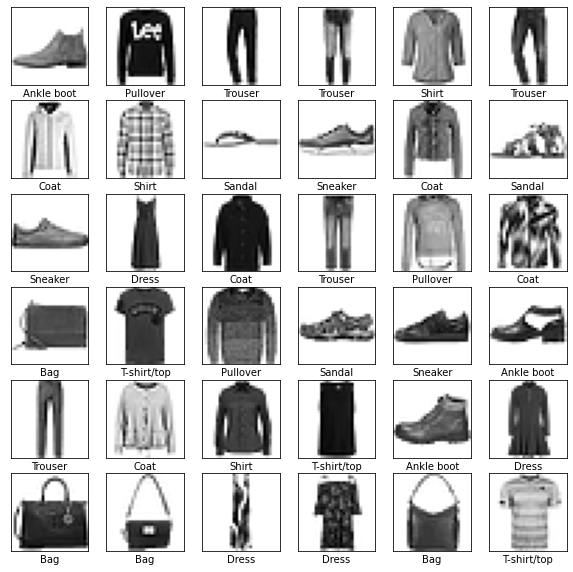

In [48]:
"""Verifying Prediction"""
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
plt.figure(figsize=(10,10)) 
for i 
    plt.subplot(6,6,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(test_images[i], cmap=plt.cm.binary) 
    plt.xlabel(class_names[test_labels[i]])
plt.show()

In [49]:
probability_model = tf.keras.Sequential([model1, tf.keras.layers.Softmax()])

In [50]:
predictions = probability_model.predict(test_images)

313/313 [==============================] - 0s 1ms/step


In [51]:
predictions[9]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

In [52]:
np.argmax(predictions[9])

7

In [53]:
test_labels[9]

7

In [67]:
def plot_image(i, predictions_array, true_label, img): 
    true_label, img = true_label[i], img[i]
    plt.grid(False) 
    plt.xticks([]) 
    plt.yticks([])
    plt.imshow(img, cmap=plt.cm.binary)
    predicted_label = np.argmax(predictions_array) 
    if predicted_label == true_label:
     color = 'blue' 
    else:
     color = 'red'
    plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], 100*np.max(predictions_array),class_names[true_label]), color=color)

In [69]:
def plot_value_array(i, predictions_array, true_label): 
    true_label = true_label[i]
    plt.grid(False)
    plt.xticks(range(10))
    plt.yticks([])
    thisplot = plt.bar(range(10), predictions_array, color="#777777") 
    plt.ylim([0, 1])
    predicted_label = np.argmax(predictions_array)
    
    thisplot[predicted_label].set_color('red') 
    thisplot[true_label].set_color('blue')

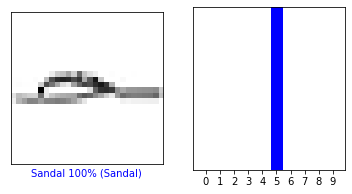

In [70]:
i= 8
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images) 
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels) 
plt.show()